In [ ]:
! wget https://raw.githubusercontent.com/Russkova/diplom/main/data_preprocessing.py -O data_preprocessing.py
! wget https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/scaledsvd.py -O scaledsvd.py

! pip install lightfm
!apt-get install libsuitesparse-dev
!pip install scikit-sparse
! wget https://raw.githubusercontent.com/Russkova/diplom/main/hybrids.py -O hybrids.py

--2024-05-23 09:37:12--  https://raw.githubusercontent.com/Russkova/diplom/main/data_preprocessing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11288 (11K) [text/plain]
Saving to: ‘data_preprocessing.py’

data_preprocessing. 100%[===================>]  11.02K  --.-KB/s    in 0.001s  

2024-05-23 09:37:12 (12.7 MB/s) - ‘data_preprocessing.py’ saved [11288/11288]

--2024-05-23 09:37:12--  https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/scaledsvd.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1507 (1.5K) [

In [ ]:
! pip install --upgrade git+https://github.com/Russkova/polara@main#egg=polara


  Cloning https://github.com/Russkova/polara (to revision main) to /tmp/pip-install-uddl5_iw/polara_e68d3ddf48b549c5a4c76f5782467366
  Running command git clone --filter=blob:none --quiet https://github.com/Russkova/polara /tmp/pip-install-uddl5_iw/polara_e68d3ddf48b549c5a4c76f5782467366
  Resolved https://github.com/Russkova/polara to commit f42942bef0c2c2c0b344c9e93164e2e799e7176c
  Preparing metadata (setup.py) ... done
  Created wheel for polara: filename=polara-0.7.2-py3-none-any.whl size=86271 sha256=45ee7d4ab276b353432380275ea238b844af1b034abfa57f8670885111e453b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-4kea_uqn/wheels/ce/05/37/5a9c8c1d28b55ab27441755eac459c8dae32bcf6592950c761
Successfully built polara


In [ ]:
! pip install ipypb
! wget https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/data/meta_info_ml1m.csv -O meta_info_ml1m.csv
! wget https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/utils.py -O utils.py
!apt-get install libsuitesparse-dev
!pip install scikit-sparse
! wget https://github.com/Russkova/diplom/raw/main/ml-1m.zip -O ml-1m.zip

--2024-05-23 09:39:07--  https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/data/meta_info_ml1m.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432261 (422K) [text/plain]
Saving to: ‘meta_info_ml1m.csv’

meta_info_ml1m.csv  100%[===================>] 422.13K  --.-KB/s    in 0.03s   

2024-05-23 09:39:08 (16.1 MB/s) - ‘meta_info_ml1m.csv’ saved [432261/432261]

--2024-05-23 09:39:08--  https://raw.githubusercontent.com/evfro/recsys19_hybridsvd/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3773 (

In [ ]:
import numpy as np
import pandas as pd
from ipypb import track

from polara.evaluation import evaluation_engine as ee
from polara.evaluation.pipelines import find_optimal_svd_rank, evaluate_models
from polara import (SVDModel,
                    PopularityModel,
                    RandomModel)
from polara.recommender.hybrid.models import SimilarityAggregation
from polara.recommender.coldstart.models import (SVDModelItemColdStart,
                                                 RandomModelItemColdStart,
                                                 PopularityModelItemColdStart,
                                                 SimilarityAggregationItemColdStart)

from data_preprocessing import (get_movielens_data,
                                get_bookcrossing_data,
                                get_similarity_data,
                                prepare_data_model,
                                prepare_cold_start_data_model,
                                SimilarityDataModel)
from utils import (report_results, save_results,
                   apply_config, print_data_stats,
                   save_training_time, save_cv_training_time)
%matplotlib inline

In [ ]:
from polara.recommender import defaults
defaults.memory_hard_limit = 5 # allowed memory usage during recommendations generation

In [ ]:
seed = 42

In [ ]:
data_labels = ['Amze']
svd_ranks = {'Amze': [1, 5, 10, 15, 20, 30, 50, 60, 75, 100, 125, 150, 200, 250, 300,
              350, 400, 500, 750, 1000]}
topk_values = [1, 3, 10, 20, 30]
target_metric = 'mrr'
data_dict = dict.fromkeys(data_labels)
meta_dict = dict.fromkeys(data_labels)
similarities = dict.fromkeys(data_labels)
sim_indices = dict.fromkeys(data_labels)
feature_idx = dict.fromkeys(data_labels)
all_data = [data_dict, similarities, sim_indices, meta_dict]
lbl = 'Amze'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train =  pd.read_csv('/content/drive/MyDrive/AMZetrain.csv')

data =  pd.read_csv('/content/drive/MyDrive/AMZedata.csv')

In [ ]:
data['rating'].unique()

array([1, 0])

In [ ]:
data_dict['Amze'] = train

In [ ]:
train = train.sort_values(['userid', 'Timestamp'], ascending=[True, True])
data_dict[lbl] = data_dict[lbl].sort_values(['userid', 'Timestamp'], ascending=[True, True])


In [ ]:
meta_dict[lbl] =  pd.DataFrame()

meta_dict[lbl].index.name = 'itemid'

In [ ]:
similarities[lbl] = {'userid': None, 'itemid': None}
sim_indices[lbl] = {'userid': data_dict[lbl]['userid'].unique(), 'itemid': data_dict[lbl]['itemid'].unique()}

In [ ]:
(meta_dict[lbl].applymap(len).sum(axis=1)==0).mean()

0.0

## Data stats

In [ ]:
print_data_stats(data_labels, all_data)

# Standard experiment

In [ ]:

def prepare_data_model_last_rating_hold(data_label, raw_data, similarities, sim_indices, item_meta, seed=0, feedback=None, custom_order='date'):
    userid = 'userid'
    itemid = item_meta[data_label].index.name
    data_model = SimilarityDataModel(similarities[data_label],
                                     sim_indices[data_label],
                                     raw_data[data_label],
                                     userid, itemid,
                                     feedback=feedback,
                                     seed=seed)
    data_model.test_fold = 0
    data_model.test_ratio = 0
    data_model.holdout_size = 1
    data_model._custom_order  = custom_order
    data_model.random_holdout = False
    data_model.warm_start = False
    data_model.verbose = False
    data_model.prepare()
    return data_model

In [ ]:



def fine_tune_svd(model, ranks, label, record_time=False):
    best_svd_rank, svd_scores = find_optimal_svd_rank(model, ranks, target_metric,
                                                      return_scores=True,
                                                      iterator=lambda x: track(x, label=label))
    model_config = {model.method: {'rank': best_svd_rank}}
    model_scores = {model.method: svd_scores}
    try:
        if record_time:
            max_rank = max(ranks)
            save_training_time(f'{experiment_name}_rank_{max_rank}', model, pd.Index([max_rank], name='rank'), label)
    finally:
        return model_config, model_scores

In [ ]:
config = {}
scores = {}
data_models = {}

In [ ]:
data_dict['Amze']

,userid,itemid,rating,Timestamp
0,93,8930,1,1016668800
1,93,1660,1,1118016000
2,93,43597,1,1160438400
3,93,73184,1,1201219200
4,93,97502,1,1222041600
...,...,...,...,...
155274,2786868,447670,1,1404259200
155275,2786868,470440,1,1404691200
155276,2786868,472659,1,1404777600
155277,2786868,470324,1,1405209600


In [ ]:
data = data_dict['ML1M']

In [ ]:
data_labels = ['Amze']

In [ ]:
for label in track(data_labels):
    data_models[label] = prepare_data_model_last_rating_hold(label, *all_data, seed, custom_order='Timestamp') # мой вариант вписать колонку дат
    config[label], scores[label] = fine_tune_svd(SVDModel(data_models[label]),
                                                 svd_ranks[label],
                                                 label, True)

 [████████████████████████████████████████████████████████████] 1/1 [02:39<02:39, 158.57s/it]

           Amze [█████████████████████████████████████████████] 20/20 [00:44<00:01, 2.21s/it]

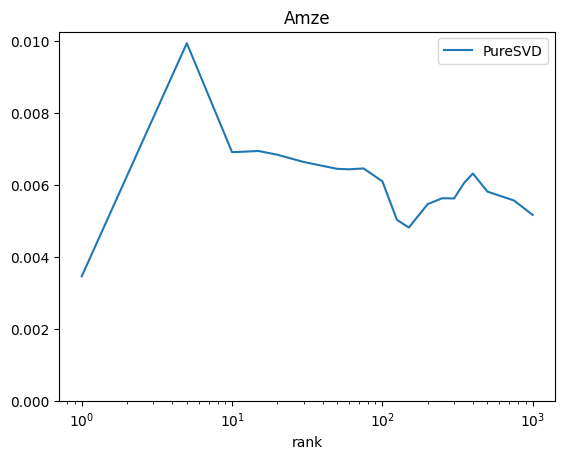

In [ ]:
report_results('rank', scores);

In [ ]:
config

{'Amze': {'PureSVD': {'rank': 5}}}

## Проверка метрик на последнем отзыве


In [ ]:
data_dict[lbl] = data

In [ ]:
data_last = prepare_data_model_last_rating_hold(label, *all_data, seed, custom_order='Timestamp') # мой вариант вписать колонку дат
model_last = SVDModel(data_last)
model_last.rank = 5
model_last.evaluate()

PureSVD model is not ready. Rebuilding.
PureSVD training time: 0.081s


[Relevance(hr=0.02906865557467967),
 Ranking(arhr=0.009951977221053527, mrr=0.009951977221053527),
 Experience(coverage=0.009299922500645827),
 Hits(true_positive=152, false_positive=52138, true_negative=None, false_negative=5077)]